> This notebook presents shows how to solve some tasks with random action, assigned deterministic action, or heuristic action and how to render the process of tasks to video.

In [1]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

import sys
#set google_drive path
sys.path.append('/content/drive/My Drive/RL/hw1')
%cd /content/drive/My Drive/RL/hw1
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/RL/hw1
Gym_Envs_1_preamble_evn_list.ipynb  Gym_Env_simple_policy_render.ipynb	video


# CoLab Preambles

Most of the requirements of python packages are already fulfilled on CoLab. To run Gym, you have to install prerequisites like xvbf,opengl & other python-dev packages using the following codes.
SWIG is an interface compiler that connects programs written in C and C++ with scripting languages such as Perl, Python, Ruby, and Tcl. 

In [2]:
!apt-get update --fix-missing
!apt-get install swig
!apt-get install python-opengl -y
!apt install xvfb -y

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:6 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:9 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:14 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Fe

For mjoco environment

In [3]:
!apt-get install -y \
    libgl1-mesa-dev \
    libgl1-mesa-glx \
    libglew-dev \
    libosmesa6-dev \
    software-properties-common

!apt-get install -y patchelf
!pip install free-mujoco-py

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libglew-dev is already the newest version (2.1.0-4).
libgl1-mesa-dev is already the newest version (21.2.6-0ubuntu0.1~20.04.2).
libgl1-mesa-glx is already the newest version (21.2.6-0ubuntu0.1~20.04.2).
libosmesa6-dev is already the newest version (21.2.6-0ubuntu0.1~20.04.2).
software-properties-common is already the newest version (0.99.9.11).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
patchelf is already the newest version (0.10-2build1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install gymnasium[classic-control]
!pip install moviepy --upgrade
!pip install imageio-ffmpeg
!pip install pyvirtualdisplay
!pip install piglet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install pyvirtualdisplay
!pip install piglet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


For rendering environment, you can use pyvirtualdisplay. So fulfill that 

Gymnasium is an open source Python library for developing and comparing reinforcement learning algorithms by providing a standard API to communicate between learning algorithms and environments, as well as a standard set of environments compliant with that API. This is a fork of OpenAI's Gym library by it's maintainers (OpenAI handed over maintenance a few years ago to an outside team), and is where future maintenance will occur going forward.

The documentation website is at gymnasium.farama.org, and we have a public discord server (which we also use to coordinate development work) that you can join here: https://discord.gg/bnJ6kubTg6

To activate virtual display we need to run a script once for training an agent, as follows:

In [6]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [7]:
# This code creates a virtual display to draw game images on. 
# If you are running locally, just ignore it
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

In [8]:
import gymnasium as gym
#from gym import logger as gymlogger
from gymnasium.wrappers.record_video import RecordVideo
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

In [9]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video(str):
  str2= "/*.mp4"
  path = f"{str}{str2}"
  print(path) 
  
  mp4list = glob.glob(path)
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = RecordVideo(env, './video',  episode_trigger = lambda episode_number: True)
  return env

# OpenAI Gym

OpenAI gym is a python library that wraps many classical decision problems including robot control, videogames and board games. We will use the environments it provides to test our algorithms on interesting decision problems .

This gym (https://gymnasium.farama.org/) explains more about the environment. 

Good general-purpose agents don't need to know the semantics of the observations: they can learn how to map observations to actions to maximize reward without any prior knowledge.

## Explore environment object

- env.observation_space
- env.action_space 

- env.reset() : reset environment to initial state, return first observation
- env.render(): show current environment state (a more colorful version :) )
- env.step(action) : commit action a and return (new observation, reward, is done, info)

## Classic Control

There are five classic control environments: Acrobot, CartPole, Mountain Car, Continuous Mountain Car, and Pendulum. All of these environments are stochastic in terms of their initial state, within a given range. In addition, Acrobot has noise applied to the taken action. Also, regarding both mountain car environments, the cars are underpowered to climb the mountain, so it takes some effort to reach the top.

Among Gymnasium environments, this set of environments can be considered easier ones to solve by a policy.

All environments are highly configurable via arguments specified in each environment’s documentation.

## CartPole

/usr/local/lib/python3.9/dist-packages/gymnasium/envs/registration.py:578: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.9/dist-packages/gymnasium/wrappers/record_video.py:79: UserWarning: WARN: Overwriting existing videos at /content/drive/My Drive/RL/hw1/video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Observation space: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
Action space: Discrete(2)
initial observation code: (array([-0.03604347,  0.04714227,  0.02374002, -0.01510785], dtype=float32), {})
Moviepy - Building video /content/drive/My Drive/RL/hw1/video/rl-video-episode-0.mp4.
Moviepy - Writing video /content/drive/My Drive/RL/hw1/video/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/RL/hw1/video/rl-video-episode-0.mp4
./video/*.mp4


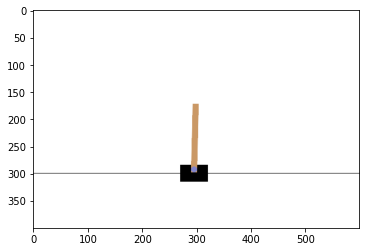

In [10]:
'''CartPole problem use random action'''
import gymnasium as gym
from gymnasium.wrappers import RecordVideo
env = gym.make('CartPole-v0', render_mode='rgb_array')
env = RecordVideo(env, './video',  episode_trigger = lambda episode_number: True)

observation = env.reset()

# explore CartPole environment
#
plt.imshow(env.render())
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)
print("initial observation code:", observation)

while True:
  env.render()
  
  # your agent goes here
  action = env.action_space.sample()   # take a random action
  observation, reward, done, truncated, info = env.step(action) 
  #print(reward)
   
  if done: 
    break;
            
env.close()
show_video('./video')

## MountainCar

### Random Action

/usr/local/lib/python3.9/dist-packages/gymnasium/wrappers/record_video.py:79: UserWarning: WARN: Overwriting existing videos at /content/drive/My Drive/RL/hw1/video/mountaincar folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action space: Discrete(3)
initial observation code: [-0.13142408 -0.7465594   0.21029262  1.4754013 ]
Moviepy - Building video /content/drive/My Drive/RL/hw1/video/mountaincar/rl-video-episode-0.mp4.
Moviepy - Writing video /content/drive/My Drive/RL/hw1/video/mountaincar/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/RL/hw1/video/mountaincar/rl-video-episode-0.mp4
./video/mountaincar/*.mp4


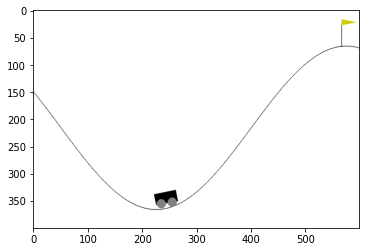

In [11]:
import gymnasium as gym

from gymnasium.wrappers import RecordVideo
env = gym.make("MountainCar-v0", render_mode="rgb_array")
env =RecordVideo(env, './video/mountaincar',  episode_trigger = lambda episode_number: True)
env.reset()
#
# explore MountainCar environment
#
plt.imshow(env.render())
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)
print("initial observation code:", observation)

    
while True:
  env.render()
  
  # your agent goes here
  action = env.action_space.sample()   # take a random action
  observation, reward, done, truc, info = env.step(action) 
  # print(reward)
   
  if done: 
    break;
            
env.close()
show_video('./video/mountaincar')

### Assigned Action

/usr/local/lib/python3.9/dist-packages/gymnasium/wrappers/record_video.py:79: UserWarning: WARN: Overwriting existing videos at /content/drive/My Drive/RL/hw1/video/cartpole folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action space: Discrete(3)


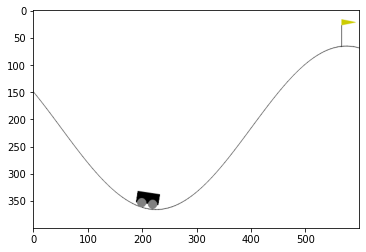

In [12]:
import gymnasium as gym
from gymnasium.wrappers import RecordVideo
env = gym.make("MountainCar-v0", render_mode="rgb_array")
env =RecordVideo(env, './video/cartpole',  episode_trigger = lambda episode_number: True)
env.reset()

plt.imshow(env.render())
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

initial observation code: (array([-0.45082164,  0.        ], dtype=float32), {})
taking action 2 (right)
new observation code: [-0.45036316  0.0004585 ]
reward: -1.0
is game over?: False


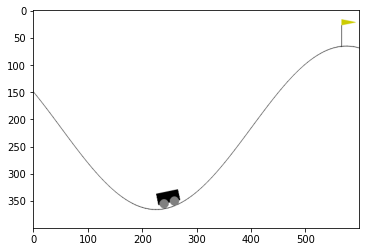

In [13]:
# Explore a little bit
obs = env.reset()
print("initial observation code:", obs)
print("taking action 2 (right)")
new_obs, reward, is_done, _, _ = env.step(2)

print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)

# As you can see, the car has moved to the right slightly (around 0.0005)
plt.imshow(env.render())

### MountainCar Video: Keep moving right by assignment

Observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action space: Discrete(3)
initial observation code: (array([-0.4384413,  0.       ], dtype=float32), {})
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (right)
-1.0
taking action 2 (

Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/RL/hw1/video/cartpole/rl-video-episode-0.mp4
./video/mountaincar/*.mp4


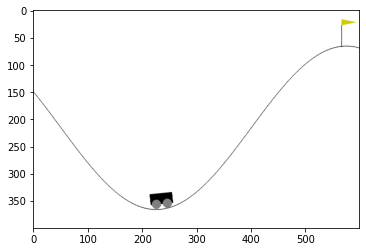

In [14]:
env.reset()
#
# explore MountainCar environment
#
plt.imshow(env.render())
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

#
# keep moving right and show the video result
# In MountainCar, observation is just two numbers: 
# car position and velocity
#
observation = env.reset()
print("initial observation code:", observation)

    
#while True:
for _ in range(100):
  env.render()
  
  # your agent goes here
  print("taking action 2 (right)")
  action = 2   
  observation, reward, done, trunc, info = env.step(action) 
  print(reward)
   
  if done: 
    env.reset()
            
env.close()
show_video('./video/mountaincar')



### MountainCar with heuristic action strategy

In [15]:
from gymnasium.wrappers import TimeLimit

# create env manually to set time limit. Please don't change this.

TIME_LIMIT = 250
env = gym.wrappers.TimeLimit(env, max_episode_steps=TIME_LIMIT + 1)
env =RecordVideo(env, './video/cartpole',  episode_trigger = lambda episode_number: True)

obs = env.reset()
actions = {'left': 0, 'stop': 1, 'right': 2}

#
# prepare "display"
#
#%matplotlib notebook
#fig = plt.figure()
#ax = fig.add_subplot(111)
#fig.show()

#
# simple heuristic policy
#
def policy(t):
    if t>50 and t<100:
        return actions['left']
    else:
        return actions['right']


for t in range(TIME_LIMIT):
    
    obs, r, done, _, _ = env.step(policy(t))
    
    if done:
        print("Well done!")
        break
#    else:    
#        print("Time limit exceeded. Try again.")

env.close()
show_video('./video/cartpole')

Moviepy - Building video /content/drive/My Drive/RL/hw1/video/cartpole/rl-video-episode-0.mp4.
Moviepy - Writing video /content/drive/My Drive/RL/hw1/video/cartpole/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/RL/hw1/video/cartpole/rl-video-episode-0.mp4
Moviepy - Building video /content/drive/My Drive/RL/hw1/video/cartpole/rl-video-episode-0.mp4.
Moviepy - Writing video /content/drive/My Drive/RL/hw1/video/cartpole/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/RL/hw1/video/cartpole/rl-video-episode-0.mp4
Well done!
./video/cartpole/*.mp4


## Atari

The Atari environments are a variety of Atari video games. Gym is already installed but not with atari game environments, to get that:
(https://gymnasium.farama.org/environments/atari/)

In [16]:
#install atari games, AutoROM and the ROMs
!pip install box2d-py
!pip install gymnasium[atari]
!pip install gymnasium[accept-rom-license]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/gymnasium/wrappers/record_video.py:79: UserWarning: WARN: Overwriting existing videos at /content/drive/My Drive/RL/hw1/video/atari folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Observation space: Box([-1.5       -1.5       -5.        -5.        -3.1415927 -5.
 -0.        -0.       ], [1.5       1.5       5.        5.        3.1415927 5.        1.
 1.       ], (8,), float32)
Action space: Discrete(4)
Observation space: Box([-1.5       -1.5       -5.        -5.        -3.1415927 -5.
 -0.        -0.       ], [1.5       1.5       5.        5.        3.1415927 5.        1.
 1.       ], (8,), float32)
Action space: Discrete(4)
Moviepy - Building video /content/drive/My Drive/RL/hw1/video/atari/rl-video-episode-0.mp4.
Moviepy - Writing video /content/drive/My Drive/RL/hw1/video/atari/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/RL/hw1/video/atari/rl-video-episode-0.mp4
Moviepy - Building video /content/drive/My Drive/RL/hw1/video/atari/rl-video-episode-1.mp4.
Moviepy - Writing video /content/drive/My Drive/RL/hw1/video/atari/rl-video-episode-1.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/RL/hw1/video/atari/rl-video-episode-1.mp4
./video/atari/*.mp4


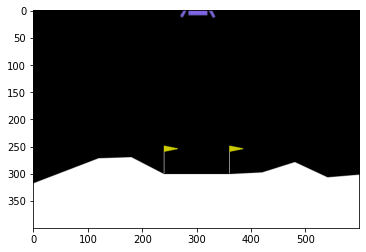

In [17]:
# Atari Environment

import gymnasium as gym
from gymnasium.wrappers import RecordVideo
from gymnasium.wrappers import HumanRendering
env = gym.make("LunarLander-v2", render_mode="rgb_array")
#wrapped = HumanRendering(env)
env = RecordVideo(env, './video/atari',  episode_trigger = lambda episode_number: True)
env.reset()

plt.imshow(env.render())
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

for _ in range(200):
  env.render()
  action = env.action_space.sample()   # take a random action
  observation, reward, terminated, truncated, info = env.step(action) 
  #print(reward)
  if terminated or truncated:
    env.reset()
           
env.close()
show_video('./video/atari')


## MuJoCo
MuJoCo stands for Multi-Joint dynamics with Contact. It is a physics engine for facilitating research and development in robotics, biomechanics, graphics and animation, and other areas where fast and accurate simulation is needed.
As of October 2021 DeepMind has acquired MuJoCo and is open-sourcing it in 2022, making it free for everyone. Instructions on installing the MuJoCo engine can be found on their site (https://mujoco.org/) and GitHub repository(https://github.com/deepmind/mujoco). There are ten Mujoco environments: Ant, HalfCheetah, Hopper, Humanoid, HumanoidStandup, IvertedDoublePendulum, InvertedPendulum, Reacher, Swimmer, and Walker. All of these environments are stochastic in terms of their initial state, with a Gaussian noise added to a fixed initial state in order to add stochasticity. The state spaces for MuJoCo environments in Gymnasium consist of two parts that are flattened and concatenated together: a position of a body part (’mujoco-py.mjsim.qpos’) or joint and its corresponding velocity (’mujoco-py.mjsim.qvel’). Often, some of the first positional elements are omitted from the state space since the reward is calculated based on their values, leaving it up to the algorithm to infer those hidden values indirectly. 
Refer the following site
https://gymnasium.farama.org/environments/mujoco/

In [18]:
!pip install gymnasium[mujoco]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To run the mujoco, refer here https://github.com/openai/mujoco-py

Compiling /usr/local/lib/python3.9/dist-packages/mujoco_py/cymj.pyx because it changed.
[1/1] Cythonizing /usr/local/lib/python3.9/dist-packages/mujoco_py/cymj.pyx
running build_ext
building 'mujoco_py.cymj' extension
creating /usr/local/lib/python3.9/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_39_linuxcpuextensionbuilder
creating /usr/local/lib/python3.9/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_39_linuxcpuextensionbuilder/temp.linux-x86_64-3.9
creating /usr/local/lib/python3.9/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_39_linuxcpuextensionbuilder/temp.linux-x86_64-3.9/usr
creating /usr/local/lib/python3.9/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_39_linuxcpuextensionbuilder/temp.linux-x86_64-3.9/usr/local
creating /usr/local/lib/python3.9/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_39_linuxcpuextensionbuilder/temp.linux-x86_64-3.9/usr/local/lib
creating /usr/local/lib/python3.9/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_39_linuxcpuexten

/usr/local/lib/python3.9/dist-packages/gymnasium/envs/registration.py:578: UserWarning: WARN: The environment HalfCheetah-v2 is out of date. You should consider upgrading to version `v4`.
  logger.warn(
/usr/local/lib/python3.9/dist-packages/gymnasium/envs/mujoco/mujoco_env.py:185: UserWarning: WARN: This version of the mujoco environments depends on the mujoco-py bindings, which are no longer maintained and may stop working. Please upgrade to the v4 versions of the environments (which depend on the mujoco python bindings instead), unless you are trying to precisely replicate previous works).
  logger.warn(


Observation space: Box(-inf, inf, (17,), float64)
Action space: Box(-1.0, 1.0, (6,), float32)
Observation space: Box(-inf, inf, (17,), float64)
Action space: Box(-1.0, 1.0, (6,), float32)
Moviepy - Building video /content/drive/My Drive/RL/hw1/video/mujoco/rl-video-episode-0.mp4.
Moviepy - Writing video /content/drive/My Drive/RL/hw1/video/mujoco/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/drive/My Drive/RL/hw1/video/mujoco/rl-video-episode-0.mp4
./video/mujoco/*.mp4


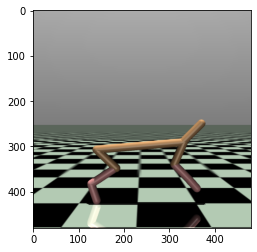

In [19]:
# Atari Environment
import mujoco_py
import gymnasium as gym
from gymnasium.wrappers import RecordVideo
from gymnasium.wrappers import HumanRendering
env = gym.make("HalfCheetah-v2", render_mode="rgb_array")

env = RecordVideo(env, './video/mujoco',  episode_trigger = lambda episode_number: True)
env.reset()

plt.imshow(env.render())
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)
print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

for _ in range(200):
  env.render()
  action = env.action_space.sample()   # take a random action
  observation, reward, terminated, truncated, info = env.step(action) 
  #print(reward)
  if terminated or truncated:
    env.reset()
           
env.close()
show_video('./video/mujoco')
